# Homework 9
## Problem 1

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [30]:
file = pd.read_csv('Txy.csv')
temp = file['T'].values
x = file['x'].values
y = file['y'].values

xInterp = interp1d(y,x)
yInterp = interp1d(x,y)





''

''

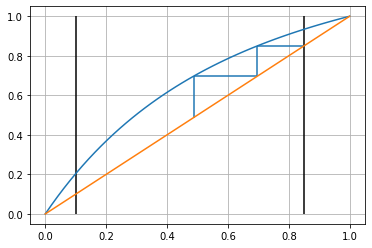

In [43]:
plt.plot(x,y)
plt.plot(x,x)
plt.vlines(0.85,0,1,'k')
plt.vlines(.1,0,1,'k')


x1 = .85
y1 = x1
x2 = xInterp(y1)
y2 = yInterp(x2)
x3 = x2
y3 = x3
x4 = xInterp(y3)
y4 = yInterp(x4)
x5 = x4
y5 = x5

plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y3)
plt.hlines(y3,x2,x4)
plt.vlines(x4,y3,y5)
plt.grid()



;